EDAs from the Dataset

Dataset: https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail

Imports

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [ ]:
data_df = pd.read_csv('dataset.csv')

Train data shape: (287113, 3)
Test data shape: (11490, 3)
Validation data shape: (13368, 3)


In [ ]:
#Checking missing values in dataset
print(data_df.isnull().sum())

id            0
article       0
highlights    0
dtype: int64
id            0
article       0
highlights    0
dtype: int64
id            0
article       0
highlights    0
dtype: int64


Data Cleaning

In [ ]:
#Define cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [ ]:
#Data cleaing and filter
def clean_and_filter(df, article_col='article', summary_col='highlights',
                     max_article_len=2000, min_summary_len=5):
    #Clean text
    df['clean_article'] = df[article_col].apply(clean_text)
    df['clean_summary'] = df[summary_col].apply(clean_text)

    #Computing lengths
    df['article_len'] = df['clean_article'].apply(lambda x: len(x.split()))
    df['summary_len'] = df['clean_summary'].apply(lambda x: len(x.split()))

    #Filtering outliers by length
    df = df[(df['article_len'] <= max_article_len) & (df['summary_len'] >= min_summary_len)]

    return df

In [ ]:
#Applying cleaning and filtering
data_df = clean_and_filter(data_df)

In [ ]:
#Printing data size after cleaning
print("\nDataset sizes after cleaning and filtering:")
print(f"Data: {len(data_df)}")



Dataset sizes after cleaning and filtering:
Train: 7000
Validation: 1500
Test: 1500


Exploratory Data Analysis (EDA)

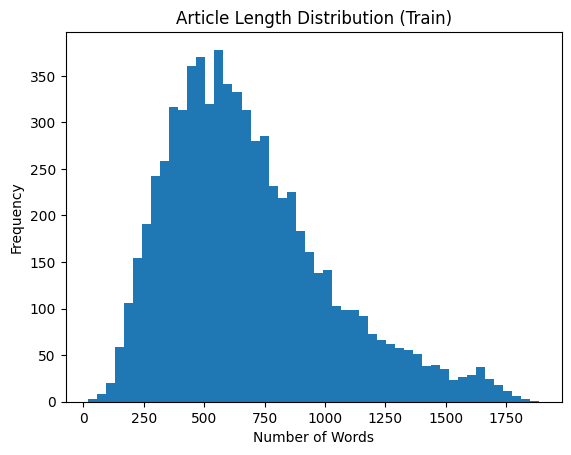

In [ ]:
#Visualizing length distributions on train set
plt.hist(data_df['article_len'], bins=50)
plt.title('Article Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

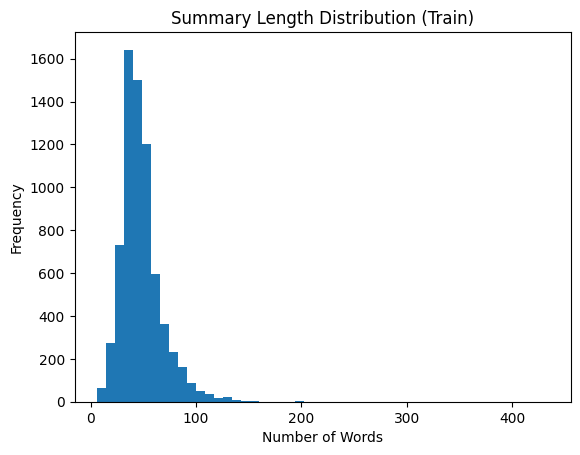

In [ ]:
#Summary length plot
plt.hist(data_df['summary_len'], bins=50)
plt.title('Summary Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Previewing cleaned text samples
print("\nSample cleaned article and summary from dataset:")
for i in range(3):
    print(f"Article {i+1}: {data_df['clean_article'].iloc[i][:200]}...")
    print(f"Summary {i+1}: {data_df['clean_summary'].iloc[i][:100]}...\n")


Sample cleaned article and summary from train set:
Article 1: by mia de graaf britons flocked to beaches across the southern coast yesterday as millions look set to bask in glorious sunshine today temperatures soared to 17c in brighton and dorset with people sta...
Summary 1: people enjoyed temperatures of 17c at brighton beach in west sussex and weymouth in dorset asda clai...

Article 2: a couple who weighed a combined 32st were shamed into slimming by their own family during christmas dinner margaret gibson 37 and her husband james 41 from biddulph staffs started piling on the pounds...
Summary 2: couple started piling on pounds after the birth of two children margaret gibson weighed 12st 5lb and...

Article 3: video footage shows the heart stopping moment a 17 year old boy was bitten on the hand by a shark sam smiths gopro vision helmet captured the sudden and brief attack while he was spear fishing on the ...
Summary 3: a 17yearold boy suffering lacerations to his left hand and f

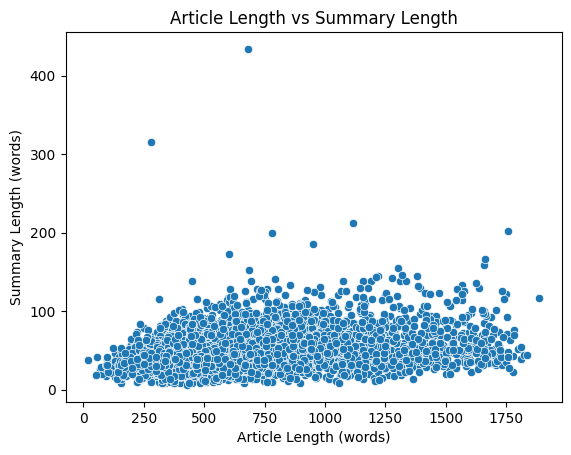

Correlation: 0.27607771990419727


In [ ]:
#Scatter plot of article length vs summary length
sns.scatterplot(x='article_len', y='summary_len', data=data_df)
plt.title('Article Length vs Summary Length')
plt.xlabel('Article Length (words)')
plt.ylabel('Summary Length (words)')
plt.show()

print("Correlation:", data_df['article_len'].corr(data_df['summary_len']))
